In [2]:
import bayes_rules_utils as br

# Example usage
print(br.summarize_beta_binomial(alpha=1, beta=15, y=25, n=50))


       model  alpha  beta      mean      mode       var        sd
0      prior      1    15  0.062500  0.000000  0.003447  0.058709
1  posterior     26    40  0.393939  0.390625  0.003563  0.059695


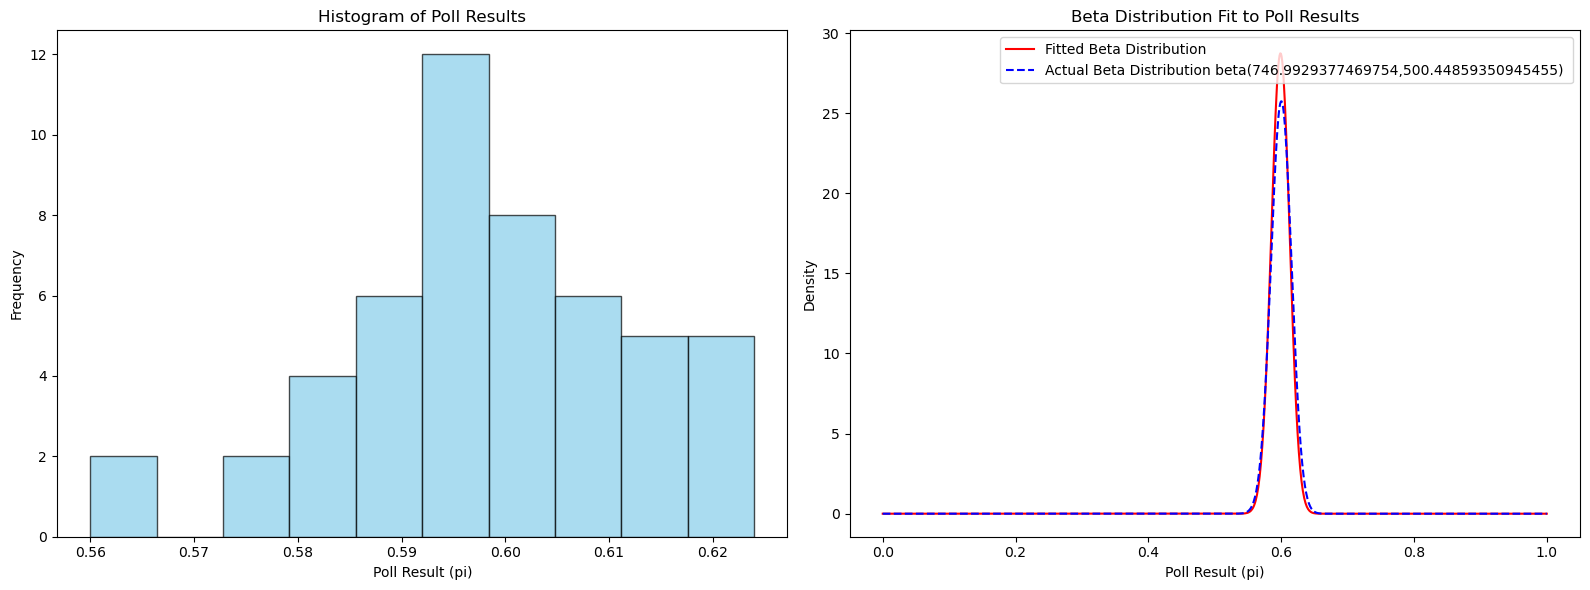

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Known-unknown pi (true probability of success)
true_pi = 0.60

# Simulate poll results
n_polls = 50
n_responses_per_poll = 1000
poll_results = np.random.binomial(n=n_responses_per_poll, p=true_pi, size=n_polls) / n_responses_per_poll

# Calculate sample mean and variance for poll results
sample_mean = np.mean(poll_results)
sample_variance = np.var(poll_results)

# Method of moments estimates for alpha and beta parameters of the Beta distribution
alpha_hat = sample_mean * (sample_mean * (1 - sample_mean) / sample_variance - 1)
beta_hat = (1 - sample_mean) * (sample_mean * (1 - sample_mean) / sample_variance - 1)

# Prepare subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of poll results
ax[0].hist(poll_results, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Poll Result (pi)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Poll Results')

# Fitted and actual Beta distribution
x = np.linspace(0, 1, 1000)
fitted_beta = beta.pdf(x, alpha_hat, beta_hat)
actual_beta = beta.pdf(x, true_pi * n_responses_per_poll, (1 - true_pi) * n_responses_per_poll)

ax[1].plot(x, fitted_beta, 'r-', label='Fitted Beta Distribution')
ax[1].plot(x, actual_beta, 'b--', label=f'Actual Beta Distribution beta({alpha_hat},{beta_hat}) ')
ax[1].set_xlabel('Poll Result (pi)')
ax[1].set_ylabel('Density')
ax[1].set_title('Beta Distribution Fit to Poll Results')
ax[1].legend()

plt.tight_layout()
plt.show()



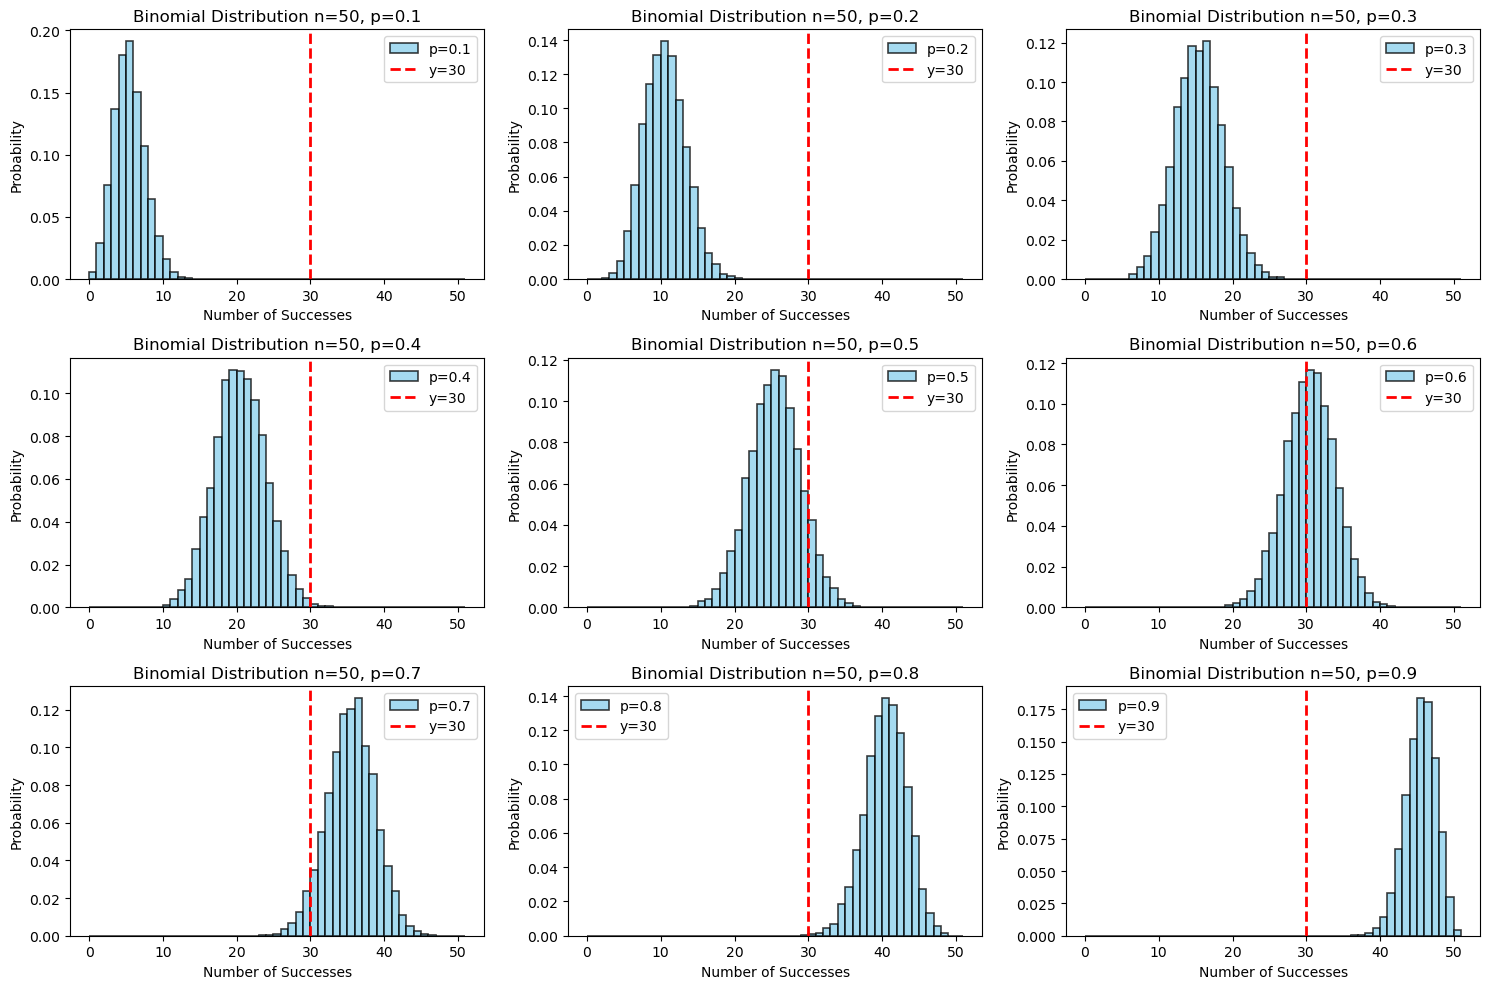

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 50  # Number of trials
p_values = np.arange(0.1, 1, 0.1)  # Probabilities of success
highlight_y = 30  # The specific value to highlight

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

for i, p in enumerate(p_values):
    # Generate binomial distribution data
    data = binom.rvs(n, p, size=10000)
    
    # Plot histogram
    axes[i].hist(data, bins=range(n+2), alpha=0.75, color='skyblue', edgecolor='black', linewidth=1.2, density=True, label=f'p={p:.1f}')
    
    # Highlight y = 30
    axes[i].axvline(x=highlight_y, color='red', linestyle='--', linewidth=2, label='y=30')
    
    # Titles and labels
    axes[i].set_title(f'Binomial Distribution n={n}, p={p:.1f}')
    axes[i].set_xlabel('Number of Successes')
    axes[i].set_ylabel('Probability')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


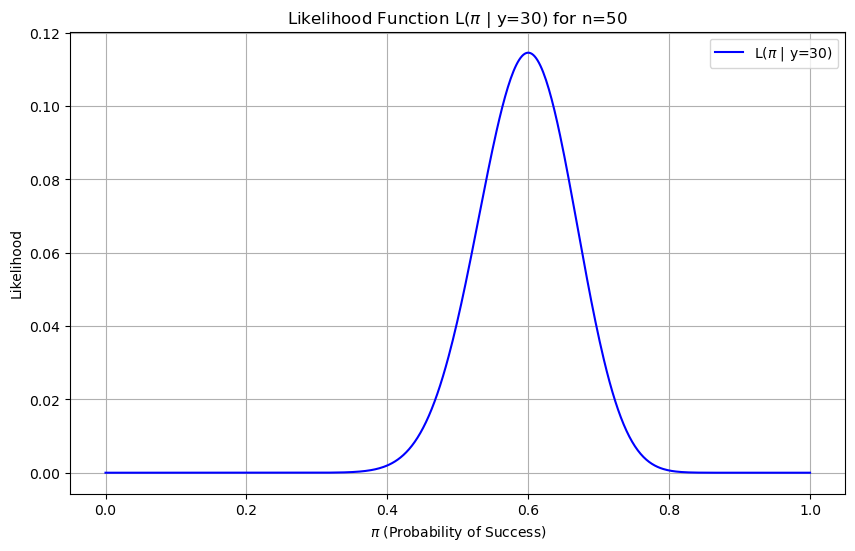

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Parameters
n = 50
y = 30
pi_values = np.linspace(0, 1, 500)  # Range of pi values from 0 to 1

# Calculate the likelihood function
likelihood = comb(n, y) * (pi_values ** y) * ((1 - pi_values) ** (n - y))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pi_values, likelihood, label=f'L($\pi$ | y={y})', color='blue')
plt.xlabel('$\pi$ (Probability of Success)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function L($\pi$ | y=30) for n=50')
plt.legend()
plt.grid(True)
plt.show()


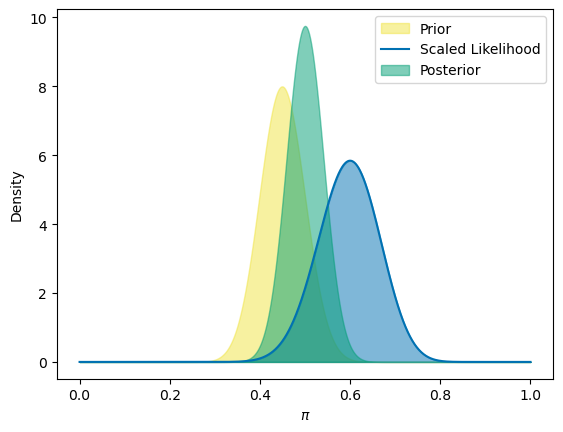

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist, binom
from scipy.integrate import quad

def plot_beta_binomial(alpha_param, beta_param, y=None, n=None, prior=True, likelihood=True, posterior=True):
    x = np.linspace(0, 1, 1000)
    
    if prior:
        plt.fill_between(x, beta_dist.pdf(x, alpha_param, beta_param), alpha=0.5, color="#f0e442", label="Prior")
    
    if y is not None and n is not None:
        # Scaled likelihood function
        def likelihood_function(pi):
            return binom.pmf(y, n, pi)
        scale_factor, _ = quad(likelihood_function, 0, 1)
        scaled_likelihood = likelihood_function(x) / scale_factor
        
        # Posterior parameters
        alpha_post = alpha_param + y
        beta_post = beta_param + n - y
        
        if likelihood:
            plt.plot(x, scaled_likelihood, color="#0071b2", label="Scaled Likelihood")
            plt.fill_between(x, 0, scaled_likelihood, alpha=0.5, color="#0071b2")
        
        if posterior:
            plt.fill_between(x, 0, beta_dist.pdf(x, alpha_post, beta_post), alpha=0.5, color="#009e74", label="Posterior")
    
    plt.xlabel("$\pi$")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Example usage with corrected parameter names to avoid conflict:
plot_beta_binomial(alpha_param=45, beta_param=55, y=30, n=50)
# plot_beta_binomial(alpha_param=45, beta_param=55, y=30, n=50, prior=False)





In [3]:
import numpy as np
import pandas as pd
from scipy.stats import beta, binom

# Setting the seed for reproducibility
np.random.seed(84735)

# Simulating 10,000 values from the Beta(45, 55) distribution
pi_values = beta.rvs(45, 55, size=10000)

# Simulating poll results (Y) for each pi value
y_values = binom.rvs(50, pi_values)

# Creating a DataFrame similar to the R data.frame
michelle_sim = pd.DataFrame({'pi': pi_values, 'y': y_values})

# select elements from the DataFrame where y_values are equal to 30
michelle_sim_30 = michelle_sim[michelle_sim['y'] == 30]

# Displaying the first few rows of the DataFrame
print(michelle_sim.head())
print (michelle_sim_30.head())

         pi   y
0  0.479492  28
1  0.385205  16
2  0.412269  19
3  0.458158  20
4  0.397845  24
           pi   y
111  0.421888  30
116  0.525859  30
125  0.559326  30
225  0.452869  30
306  0.469191  30


c:\Users\brady\anaconda3\envs\bap3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\brady\anaconda3\envs\bap3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\brady\anaconda3\envs\bap3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\brady\anaconda3\envs\bap3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

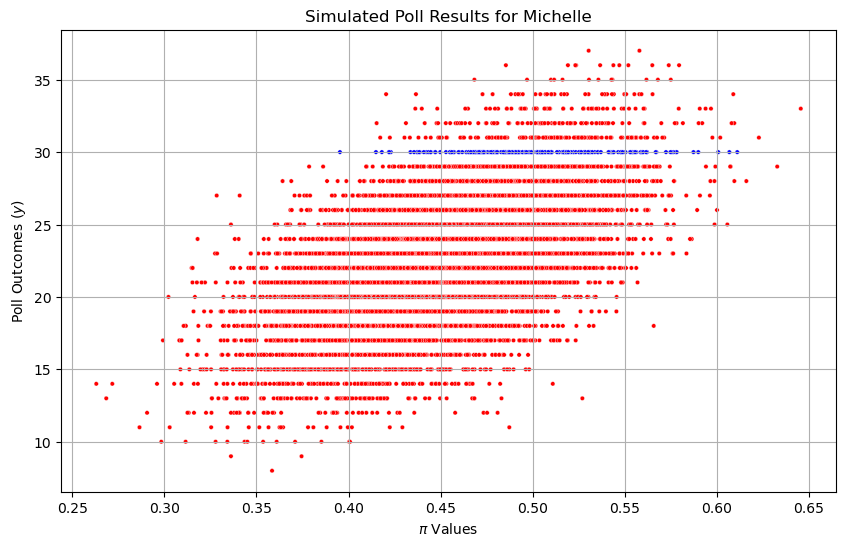

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming michelle_sim is a pandas DataFrame with 'pi' and 'y' columns
# michelle_sim = pd.DataFrame({'pi': pi_values, 'y': y_values})  # Example setup

# Create a new column for color mapping based on y == 30 condition
michelle_sim['color'] = np.where(michelle_sim['y'] == 30, 'Yes', 'No')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=michelle_sim, x='pi', y='y', hue='color', palette=['red', 'blue'], legend=False, s=10)

# Adjustments for aesthetics similar to ggplot in R
plt.title('Simulated Poll Results for Michelle')
plt.xlabel('$\pi$ Values')
plt.ylabel('Poll Outcomes ($y$)')
plt.grid(True)  # Adding grid for better readability, optional

plt.show()


            pi   y
111   0.421888  30
116   0.525859  30
125   0.559326  30
225   0.452869  30
306   0.469191  30
...        ...  ..
9659  0.470869  30
9686  0.530054  30
9956  0.461725  30
9966  0.505094  30
9982  0.496564  30

[219 rows x 2 columns]


c:\Users\brady\anaconda3\envs\bap3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\brady\anaconda3\envs\bap3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


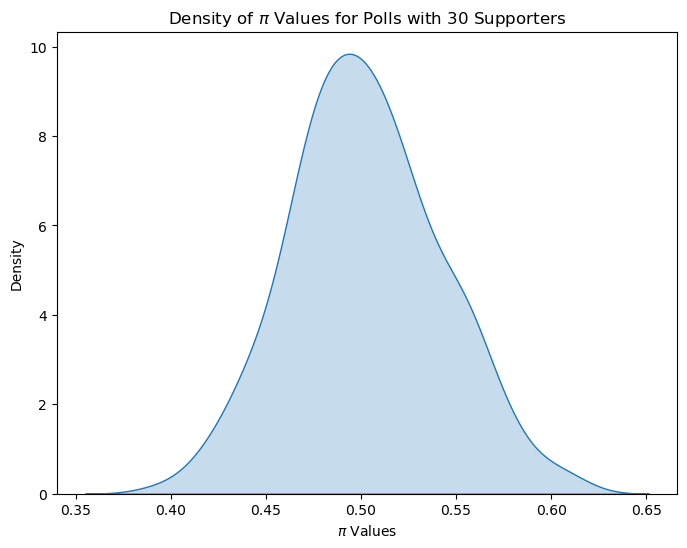

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming michelle_sim is a pandas DataFrame with columns 'pi' and 'y'

# Filter the DataFrame to include only rows where y equals 30
michelle_posterior = michelle_sim[michelle_sim['y'] == 30]

print(michelle_posterior)

# Plot the density of pi values in the filtered DataFrame
plt.figure(figsize=(8, 6))
sns.kdeplot(data=michelle_posterior, x='pi', fill=True)
plt.title('Density of $\pi$ Values for Polls with 30 Supporters')
plt.xlabel('$\pi$ Values')
plt.ylabel('Density')
plt.show()


Y|π ∼ Bin(40,π)

π∼Beta(1,10)

26 out of 40 shocked the buggers:

π|(Y=26) ~ Beta(27,24)



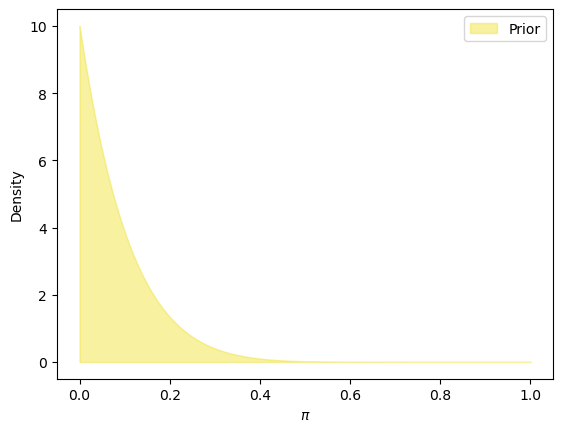

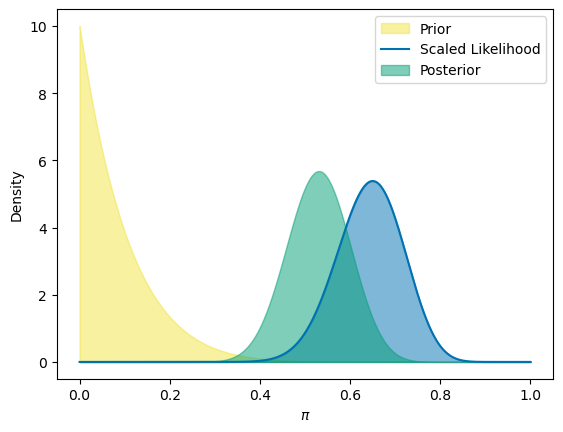

In [9]:
import bayes_rules_utils as br

# plot_beta_binomial(alpha_param=45, beta_param=55, y=30, n=50, prior=False)
plot_beta_binomial(alpha_param=1, beta_param=10)

br.summarize_beta_binomial(alpha=1, beta=10, y=30, n=50)

plot_beta_binomial(alpha_param=1, beta_param=10, y=26, n=40)
